In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Reading and veiwing the data

In [14]:
d=pd.read_csv('AAPL.csv')

In [15]:
d.head()

,Unnamed: 0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,0,AAPL,2015-05-27 00:00:00+00:00,132.045,132.260,130.05,130.34,45833246,121.682558,121.880685,119.844118,120.111360,45833246,0.0,1.0
1,1,AAPL,2015-05-28 00:00:00+00:00,131.780,131.950,131.10,131.86,30733309,121.438354,121.595013,120.811718,121.512076,30733309,0.0,1.0
2,2,AAPL,2015-05-29 00:00:00+00:00,130.280,131.450,129.90,131.23,50884452,120.056069,121.134251,119.705890,120.931516,50884452,0.0,1.0
3,3,AAPL,2015-06-01 00:00:00+00:00,130.535,131.390,130.05,131.20,32112797,120.291057,121.078960,119.844118,120.903870,32112797,0.0,1.0
4,4,AAPL,2015-06-02 00:00:00+00:00,129.960,130.655,129.32,129.86,33667627,119.761181,120.401640,119.171406,119.669029,33667627,0.0,1.0


In [16]:
data=d[['date','close']]

# Data Cleaning

In [7]:
data.head()

,date,close
0,2015-05-27 00:00:00+00:00,132.045
1,2015-05-28 00:00:00+00:00,131.780
2,2015-05-29 00:00:00+00:00,130.280
3,2015-06-01 00:00:00+00:00,130.535
4,2015-06-02 00:00:00+00:00,129.960


In [10]:
data['date'][0].split(' ')[0]

'2015-05-27'

In [17]:
data['date']=data['date'].apply(lambda x: x.split(' ')[0])

C:\Users\win10\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [18]:
data.head()

,date,close
0,2015-05-27,132.045
1,2015-05-28,131.780
2,2015-05-29,130.280
3,2015-06-01,130.535
4,2015-06-02,129.960


In [19]:
data['date']=pd.to_datetime(data['date'])

C:\Users\win10\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [20]:
data.head()

,date,close
0,2015-05-27,132.045
1,2015-05-28,131.780
2,2015-05-29,130.280
3,2015-06-01,130.535
4,2015-06-02,129.960


In [21]:
data.set_index('date',inplace=True)

In [22]:
data=data.resample('D').mean()

In [23]:
data.head()

,close
date,
2015-05-27,132.045
2015-05-28,131.780
2015-05-29,130.280
2015-05-30,NaN
2015-05-31,NaN


# Filling the missing values with previous values

In [24]:
data=data.bfill()

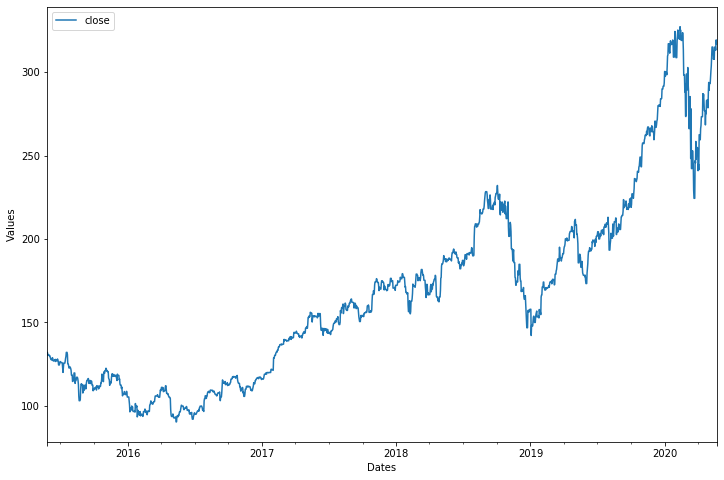

In [27]:
data.plot(figsize=(12,8),label='Data')
plt.xlabel('Dates')
plt.ylabel('Values')
plt.show()

# Finding the required parameters

In [ ]:
first=maximun-diff*0.236
second=maximun-diff*0.382
third=maximun-diff*0.5
fourth=maximun-diff*0.618

In [28]:
maximum=data['close'].max()
minimum=data['close'].min()
difference=maximum-minimum

In [29]:
first=maximum-difference*0.236
second=maximum-difference*0.382
third=maximum-difference*0.5
fourth=maximum-difference*0.618

In [36]:
labels=['close','fourth','third','second','first']

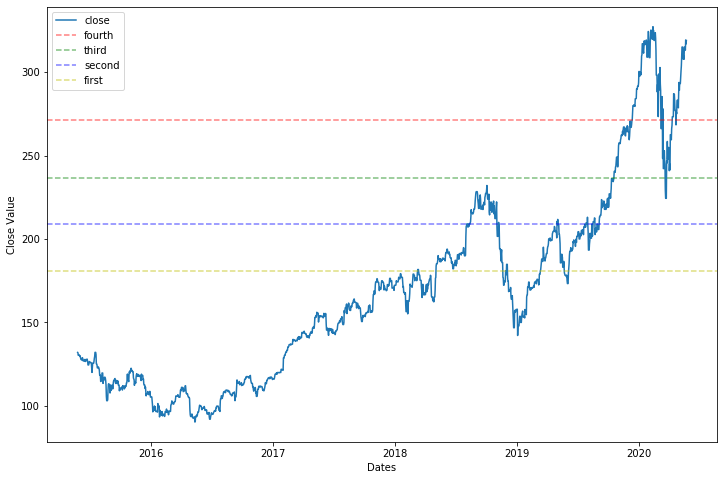

In [37]:
plt.figure(figsize=(12,8))
plt.plot(data.index,data.close)
plt.axhline(first,color='r',linestyle='dashed',alpha=0.5,)
plt.axhline(second,color='g',linestyle='dashed',alpha=0.5)
plt.axhline(third,color='b',linestyle='dashed',alpha=0.5)
plt.axhline(fourth,color='y',linestyle='dashed',alpha=0.5)
plt.legend(labels)
plt.xlabel('Dates')
plt.ylabel('Close Value')
plt.show()

In [38]:
shortlma=data['close'].ewm(span=12,adjust=False).mean()
longlma=data['close'].ewm(span=26,adjust=False).mean()

# Finding Signal and MCDA

In [39]:
mcda=shortlma-longlma

In [40]:
signal=mcda.ewm(span=9,adjust=False).mean()

In [41]:
data['Mcda']=mcda
data['signal']=signal

In [42]:
data.head()

,close,Mcda,signal
date,,,
2015-05-27,132.045,0.000000,0.000000
2015-05-28,131.780,-0.021140,-0.004228
2015-05-29,130.280,-0.157119,-0.034806
2015-05-30,130.535,-0.241523,-0.076150
2015-05-31,130.535,-0.304900,-0.121900


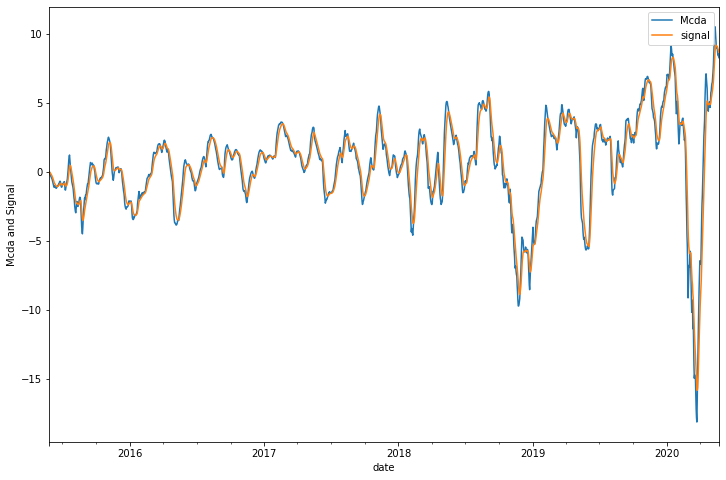

In [46]:
data[['Mcda','signal']].plot(figsize=(12,8),legend=True)
plt.ylabel('Mcda and Signal')
plt.show()

# Fibonacci Strategy

In [47]:
def getprice(price):
    if price >= first:
        return maximum,first
    elif price >=second:
        return first,second
    elif price >= third:
        return second,third
    elif price >= fourth:
        return third,fourth
    else:
        return fourth,minimum

In [52]:
def strategy(data):
    buy_list=[]
    sell_list=[]
    flag=0
    last_price=0
    for i in range(0,len(data)):
        price=data['close'][i]

        if i==0:
            upper,lower=getprice(price)
            buy_list.append(np.nan)
            sell_list.append(np.nan)
        elif price >= upper or price <= lower:
            if data['signal'][i] > data['Mcda'][i] and flag==0:
                buy_list.append(price)
                sell_list.append(np.nan)
                flag=1
                last_price=price
            elif data['signal'][i] < data['Mcda'][i] and flag==1 and price >= last_price:
                buy_list.append(np.nan)
                sell_list.append(price)
                flag=0
            else:
                buy_list.append(np.nan)
                sell_list.append(np.nan)
        else:
            buy_list.append(np.nan)
            sell_list.append(np.nan)
        upper,lower=getprice(price)

    return buy_list,sell_list
        
        
    

In [54]:
buy,sell=strategy(data)

In [55]:
data['buy']=buy
data['sell']=sell

In [56]:
data.isnull().sum()

close        0
Mcda         0
signal       0
buy       1816
sell      1817
dtype: int64

# Final Plot

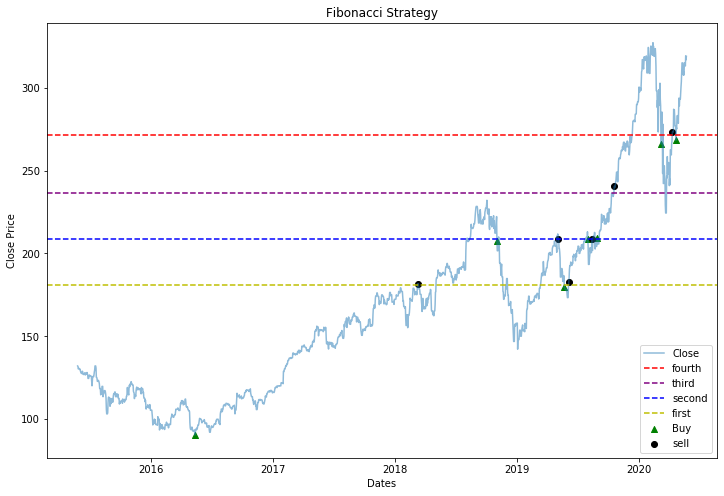

In [68]:
plt.figure(figsize=(12,8))
plt.plot(data.index,data.close,alpha=0.5)
plt.scatter(data.index,data.buy,marker='^',alpha=1,color='g',label='Buy')
plt.scatter(data.index,data.sell,marker='o',alpha=1,color='black',label='Sell')
plt.axhline(first,color='r',linestyle='dashed',alpha=1)
plt.axhline(second,color='purple',linestyle='dashed',alpha=1)
plt.axhline(third,color='b',linestyle='dashed',alpha=1)
plt.axhline(fourth,color='y',linestyle='dashed',alpha=1)
plt.legend(['Close','fourth','third','second','first','Buy','sell'])
plt.xlabel('Dates')
plt.ylabel('Close Price')
plt.title('Fibonacci Strategy')
plt.show()

# Forescasting

In [126]:
data=d[['date','close']]

In [127]:
data['date']=data['date'].apply(lambda x: x.split(' ')[0])

C:\Users\win10\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [128]:
data['date']=pd.to_datetime(data['date'])

C:\Users\win10\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [129]:
data.set_index('date',inplace=True)

# Resampling to monthly data

In [130]:
data=data.resample('M').mean()

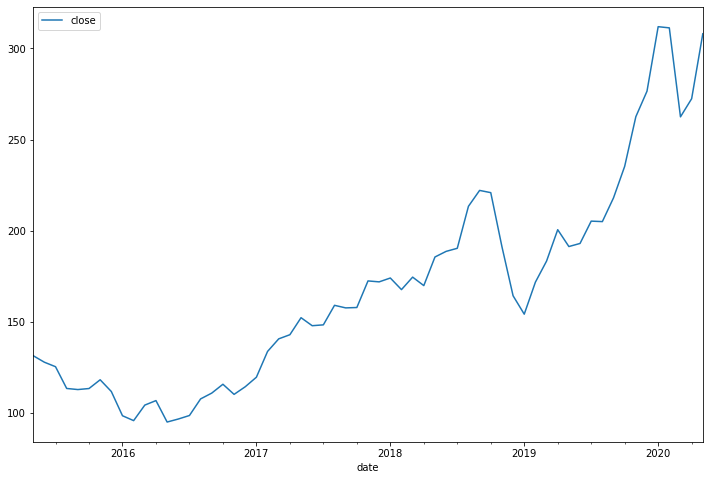

In [131]:
data.plot(figsize=(12,8))

In [132]:
data.shape

(61, 1)

# Spliting the data

In [135]:
train_data=data.iloc[:45]
test_data=data.iloc[45:]

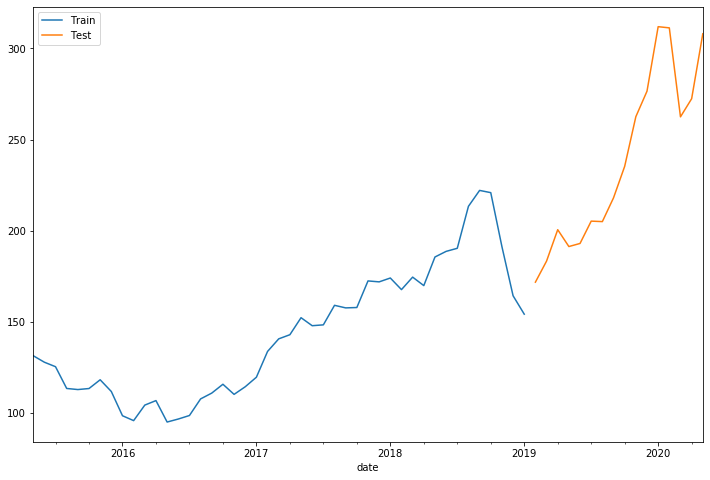

In [136]:
train_data['close'].plot(figsize=(12,8),label='Train',legend=True)
test_data['close'].plot(label='Test',legend=True)

# HoltWintersMethod for Prediction

In [137]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [138]:
ex=ExponentialSmoothing(train_data,trend='mul',seasonal='mul',seasonal_periods=12).fit()

C:\Users\win10\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


In [139]:
prediction=ex.forecast(test_data.shape[0])

In [140]:
test_data['Prediction']=np.array(prediction)

C:\Users\win10\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


# Plot comparing actual and predicted values

Text(0.5, 1.0, 'HoltwintersMethod')

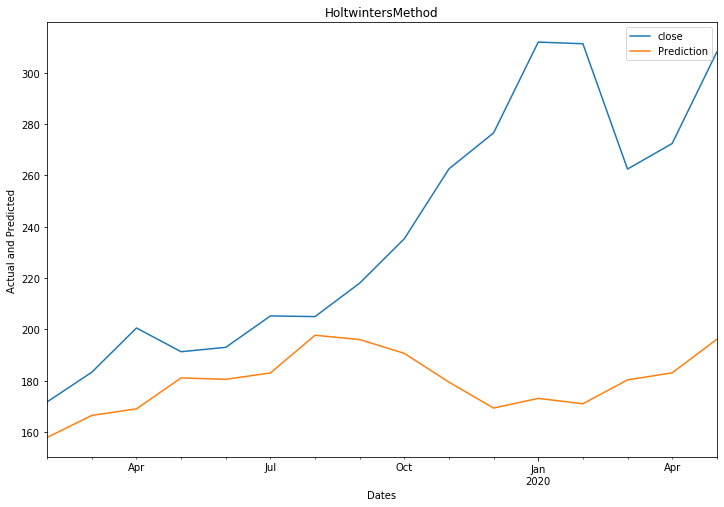

In [142]:
test_data.plot(figsize=(12,8),legend=True)
plt.xlabel('Dates')
plt.ylabel('Actual and Predicted')
plt.title('HoltwintersMethod')

# Final Error

In [143]:
from sklearn.metrics import mean_squared_error

In [145]:
error=np.sqrt(mean_squared_error(test_data['close'],test_data['Prediction']))
print(error)

74.73334641660655
